<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Aaron_Huizenga_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



#1) Write a function

In [62]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## Not going to lie but I was totally lost during the lecture. I think that I got 
## the gist of things so hopefully it doesn't take me too long

def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk*prob_drunk_prior)/((prob_positive_drunk*prob_drunk_prior)+(prob_positive)*(1-prob_drunk_prior))

In [64]:
arr1= []
i = 0.001
while i<1:
  arr1.append(i)
  i = prob_drunk_given_positive(i,0.10, 1)
print(arr1)

[0.001, 0.009910802775024777, 0.09099181073703365, 0.5002501250625312, 0.9091735612328394, 0.9901088129585441, 0.9990019970049919, 0.999900109979013, 0.999990010099799, 0.9999990010009979, 0.9999999001000099, 0.9999999900100001, 0.999999999001, 0.9999999999001, 0.99999999999001, 0.999999999999001, 0.9999999999999001, 0.99999999999999, 0.999999999999999, 0.9999999999999999]


In [65]:
a = len(arr1)
a

20

In [66]:
# I created my dataframe with 20 indexes but as you can see the last few were 
# all rounded to 1 so i wanted to select those that were not rounded up

ind_pos = range(0,20)
arr2= np.array(arr1)
df1=pd.DataFrame({"number of tests": ind_pos, "percentage of likelihood": arr2[ind_pos]})
df1

,number of tests,percentage of likelihood
0,0,0.001000
1,1,0.009911
2,2,0.090992
3,3,0.500250
4,4,0.909174
5,5,0.990109
6,6,0.999002
7,7,0.999900
8,8,0.999990
9,9,0.999999


In [67]:
# The reason that why I chose to code the way I did was so that you could see 
# the last 10 indexes were rounded up to 1 and now I will choose those that are 
# rounded up to 1

ind_pos = range(0,10)
arr2= np.array(arr1)
df1=pd.DataFrame({"number of tests": ind_pos, "percentage of likelihood": arr2[ind_pos]})
df1

,number of tests,percentage of likelihood
0,0,0.001000
1,1,0.009911
2,2,0.090992
3,3,0.500250
4,4,0.909174
5,5,0.990109
6,6,0.999002
7,7,0.999900
8,8,0.999990
9,9,0.999999


In [68]:
# this is where the bayes theorem will come into play so I am having to watch 
# videos and do reasearch to make sure that I am doing this correctly

stats.bayes_mvs(dem.mean(), alpha=0.95)

(Mean(statistic=1.4281367041198503, minmax=(1.297300366607915, 1.5589730416317855)),
 Variance(statistic=0.06956239607577823, minmax=(0.032897927262519853, 0.1444093340936888)),
 Std_dev(statistic=0.25872811744075414, minmax=(0.1813778576963568, 0.3800122815037546)))

In [69]:
# Set Random Seed for number of times tested as per frequentists statistics
np.random.seed(seed=42)

drunk = np.random.binomial(n=1, p=0.92, size=10)
print(drunk)

[1 0 1 1 1 1 1 1 1 1]


In [70]:
# Frequentists df
df2 = pd.DataFrame({"number of tests": range(0,10), "percentage of likelihood": drunk})
df2

,number of tests,percentage of likelihood
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


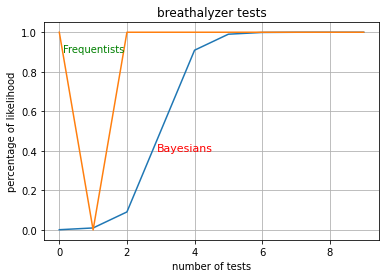

In [71]:
# What should happen with the plots is a graphic visual of what I have been 
# working on with the number of tests given vs the likelihood

fig, ax = plt.subplots()
ax.plot(df1['number of tests'],df1['percentage of likelihood'])
ax.plot(df2['number of tests'],df2['percentage of likelihood'])


ax.set(xlabel='number of tests', ylabel='percentage of likelihood',
       title='breathalyzer tests')
ax.grid()
ax.text(x=2.9, y=.4, s="Bayesians", fontsize=11, color='red')
ax.text(x=0.1, y=.9, s="Frequentists", fontsize=10, color='green')

fig.savefig("test.png")
plt.show()

#2) Explore scipy.stats.bayes_mvs

In [88]:
# One of the tasks on the assignment was to explore scipy.stats.bayes_mvs
# So that is what I plan on doing in the following code

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-04-15 19:52:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.3’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-04-15 19:52:07 (484 KB/s) - ‘house-votes-84.data.3’ saved [18171/18171]



In [89]:
columns = [   
   'party',
   'handicapped-infants',
   'water-project',
   'budget',
   'physician-fee-freeze',
   'el-salvador-aid',
   'religious-groups',
   'anti-satellite-ban',
   'aid-to-contras',
   'mx-missile',
   'immigration',
   'synfuels',
   'education',
   'right-to-sue',
   'crime',
   'duty_free',
   'south_Africa']
df = pd.read_csv('house-votes-84.data', names=columns)
df.head(1)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y


In [90]:
# Not sure why it only came up with one row, but the following code should 
# eliminate the issue

df = df.replace({'?': 'NaN', 'n':0.0, 'y':1.0,'republican':1,'democrat':0})

df.head(8)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,1,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,0,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
5,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,0,0,1,0,1,1,1,0,0,0,0,0,0,NaN,1,1,1
7,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1,NaN,1


In [0]:
df = df.astype(float)

In [0]:
a = df['budget'].dropna()

In [97]:
df.head(8)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,0.0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
7,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0


In [0]:
original_sample=a

In [0]:
sample_means = []
for x in range(3000):
  m =   np.random.choice(original_sample,300).mean()
  sample_means.append(m) 

In [0]:
from scipy.stats import bayes_mvs
m=bayes_mvs(original_sample)

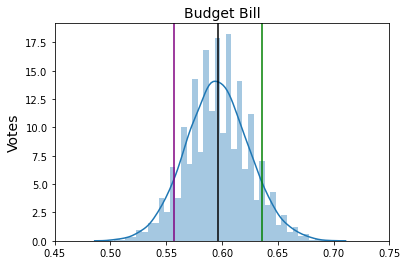

In [115]:
sns.distplot(sample_means)

plt.axvline(x=m[0][0], color='black')
plt.axvline(x=m[0][1][0], color='purple')
plt.axvline(x=m[0][1][1], color='green')
plt.title('Budget Bill', fontsize=(14))
plt.ylabel('Votes', fontsize=(14))

plt.xlim(.45, .75)
plt.show()

#3) In your own words, summarize the difference between Bayesian and frequentist statistics

- If I am understanding this in a way that is broken down for an absolute beginner, then I would say the difference would be in now the probability between the two formulas are used. 
- Frequentist stats = only sampling
- Bayesian Theorem = sampling and the unknown certainty

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

# Coin flip example trying to use a Bayesian Technique

In [0]:
## I am not to a point to where I can do this just yet. I will see if I can add 
## to the sprint at the end of the week.